# Innlevering 2, Oppgave 1-6
## Oppgave 1 *

La $X$ være en diskret fordelt stokastisk variabel med punktsannsynlighet $f(x)=P(X=x)$ som angitt i følgende tabell.

| $x$ |  | $f(x)$ |
|:---:|----|:------:|
| $0$ |  | $0.05$ |
| $1$ |  | $0.10$ |
| $2$ |  | $0.25$ |
| $3$ |  | $0.40$ |
| $4$ |  | $0.15$ |
| $5$ |  | $0.05$ |

  * Finn $P(X \leq 2)$
  
Python-koden under definerer en funksjon <em>simX</em> som genererer $n$ realisasjoner av $X$. Denne funksjonen kan du benytte til å besvare neste spørsmål. <em>Merk: Studer koden slik at du senere selv kan skrive pythonfunksjoner.</em>

In [2]:
# Importer nødvendige biblioteker, denne cellen må kjøres før annen kode.
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# UTLEVERT KODE (ingenting her skal endres)
# punktsannsynlighet
f_x = np.array([0.05,0.10,0.25,0.40,0.15,0.05])

# kumulativ fordelingsfunksjon
F_x = [np.sum(f_x[:i]) for i in range(1,7)]

def simX(n):
    # verdimengde
    x = np.arange(6) 
    # for lagring av realisasjoner
    x_sim = np.zeros(n) 
    for i in range(n): # vi simulerer hver og en x for seg
        u = np.random.uniform() # en realisasjon fra U(0,1)
        if(u < F_x[0]): # hvis u er mindre enn den laveste 
                        # verdien i F_x vil 
                         # vi at realisasjonen skal være 0
            x_sim[i] = x[0]
        elif(u <= F_x[1]): # hvis u er mindre enn den nest 
                           # laveste verdien (men større enn laveste) 
                           # vil vi at x skal bli 1
            x_sim[i] = x[1]
        elif(u <= F_x[2]):
            x_sim[i] = x[2]
        elif(u <= F_x[3]):
            x_sim[i] = x[3]
        elif(u <= F_x[4]):
            x_sim[i] = x[4]
        elif(u > F_x[4]): 
            x_sim[i] = x[5]
    return x_sim

   * Skriv python-kode som benytter stokastisk simulering, og spesielt <em>simX</em>-funksjonen definert over,
    til å finne tilnærmet verdi for $P(X\leq 2)$. Benytt for eksempel $n=1000$ og kjør gjerne 
    koden din flere ganger slik at du får en følelse av
    nøyaktigheten av tilnærmelsene. Sammenlign verdiene du finner her med den
    eksakte verdiene du fant over (og i Skriftlig innlevering 1).

In [8]:
# Antall realisasjoner man skal bruke
n = 1000

# Simuler realisasjoner av X ved å kalle på simX-funksjonen i cellen over
simulerte_X = simX(n)

# Approksimer sannsynligheten
P_X_le_2 = np.sum(simulerte_X <= 2)/n

# Skriv ut resultatet
print("Approksimert sannsynlighet: ",P_X_le_2)

Approksimert sannsynlighet:  0.41


## Oppgave 2 *

Vi skal igjen studere den diskrete sannsynlighetsfordelingen fra oppgave 1. 

* Regn ut forventningsverdien til $X$, $E[X]$
* Regn ut variansen, $\text{Var}(X)$, og standardavviket, $\text{SD}[X]$.
* Bruk <em>simX</em>-funksjonen definert over til å finne tilnærmede verdier for $E[X]$ og $\text{SD}[X]$. Sammenlign tilnærmingene med de eksakte verdiene du regnet ut over. Kjør gjerne simuleringen (f.eks med $n = 1000$ flere ganger). 

In [7]:
# Antall kjøringer
n = 1000

# Simuler n ganger
x_simulated = simX(n)

# Beregn forventningsverdien E[X]
mean_x_simulated = np.mean(x_simulated)

# Beregn standardavviket SD[X]
std_x_simulated = np.std(x_simulated)

print("Tilnærmet forventningsverdi E[X]:", mean_x_simulated)
print("Tilnærmet standardavvik SD[X]:", std_x_simulated)

Tilnærmet forventningsverdi E[X]: 2.594
Tilnærmet standardavvik SD[X]: 1.1520260413723296


## Oppgave 3 *

La $X$ være en stokastisk variabel som beskriver hvor lang tid en komponent har fungert i det den svikter.
  Vi kaller da $X$ for <em>levetiden</em> for komponenten.

  Levetiden $X$ (målt i antall år) til en bestemt type mekaniske komponenter har vist seg å
  følge en fordeling med kumulativ fordelingsfunksjon gitt ved
  \begin{align*}
    F_X(x) = 1 - \exp\left\{ -\frac{x^2}{\alpha}\right\}; x\geq 0,
  \end{align*}
  der $\alpha$ er en parameter som beskriver kvaliteten til komponentene.

### Deloppgave a)

* Finn sannsynlighetstettheten til $X$, $f_X(x)$. Eventuelt hent denne fra din besvarelse av 
Skriftlig innlevering 1.

### Deloppgave b)

La $U\sim \mbox{Unif}[0,1]$.

   * Finn en formel for hvordan man fra $U$ kan definere $X$ slik at kumulativ fordeling for $X$
      blir som angitt over.
   * Skriv en python-funksjon som genererer $n$ realisasjoner av $X$. La funksjonen ha to 
    input-parametre, antall realisasjoner $n$ og verdien til kvalitetsparameteren $\alpha$. 
    Benytt funksjonen til å generere (for eksempel) $n=10\ 000\ 000$ realisasjoner av $X$ med 
    (for eksempel) $\alpha=1$, og lag et sannsynlighetshistogram for de genererte verdiene. Spesifiser at histogrammet skal ha 100 intervaller, se kode under.
    Plott også sannsynlighetstettheten $f_X(x)$ i samme plott som
    sannsynlighetshistogrammet. Ser det ut til at du har generert 
    realisasjoner av $X$ på korrekt måte?

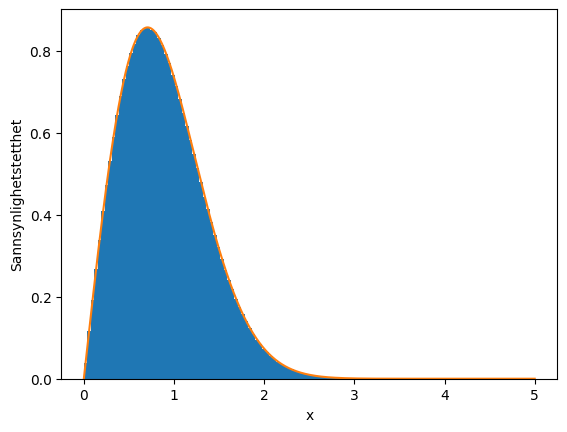

In [75]:
def generateX(n,alpha):
    u = np.random.uniform(size=n) #array med n elementer.
    x = np.sqrt(-alpha*np.log(1-u))
    
    return x

# Sett antall realisasjoner og verdien til alpha
n = 10000000
alpha = 1

# simuler realisasjoner av X
simulerte_X = generateX(n,alpha)

# Lag sannsynlighetshistogram for de simulerte verdiene, 
# vi spesifiserer antall intervaller ved å sette "bins=100"
plt.hist(simulerte_X, density=True,bins=100)  #density=True gjør at vi får et sannsynlighetshistogram

# Angi navn på aksene
plt.xlabel("x")
plt.ylabel("Sannsynlighetstetthet")

# Regn ut og plott sannsynlighetstettheten til X på samme plott
x = np.linspace(0,5,1000) # 1000 verdier mellom 0 og 5
y = (2/alpha) * x * np.exp(-(x**2)/alpha) # fyll inn formelen du fant for sannsynlighetstettheten
plt.plot(x,y)

# Avslutt med å generere alle elementene du har plottet
plt.show()

#### Her er deloppgave b) slutt.

### Deloppgave c)

Et instrument inneholder fem komponenter av denne typen, to av disse komponentene har kvalitetsparameter $\alpha = 1$ og de andre tre komponentene har $\alpha=1.2$. De fem komponentene svikter uavhengig av hverandre og instrumentet fungerer så lenge minst tre av de fem komponentene fungerer. La $Y$ betegne levetiden til instrumentet.

* Skriv en python-funksjon som genererer $n$ realisasjoner av $Y$. Funksjonen skal ha en input-parameter, nemlig antall realisasjoner $n$. Benytt funksjonen til å genererere (for eksempel) $n=10\ 000$ realisasjoner av $Y$, og lag et sannsynlighetsistogram for de genererte verdiene.
* Benytt python-funksjonen til å finne tilnærmede verdier for $P(Y\geq 1)$ og $P(Y\geq 1|Y\geq 0.75)$.

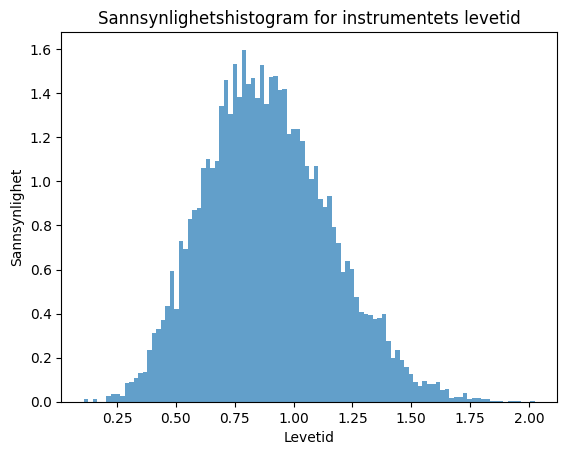

P(Y >= 1): 0.3289
P(Y >= 1 | Y >= 0.75): 0.480286214953271


In [110]:
def Y(n):
    alpha_1 = 1
    alpha_2 = 1.2

    # Generer de ulike komponentene
    x1 = generateX(n, alpha_1)
    x2 = generateX(n, alpha_1)
    x3 = generateX(n, alpha_2)
    x4 = generateX(n, alpha_2)
    x5 = generateX(n, alpha_2)
    

    # Kombinerer realisasjonene og finner den tredje lengste levetiden for hver realisasjon
    lifetime = np.vstack((x1, x2, x3, x4, x5)) 
    instrument_lifetimes = np.partition(lifetime, 2, axis=0)[2]

    return instrument_lifetimes

# Sett antall realisasjoner
n = 10000

# Generer realisasjoner for instrumentets levetid
Y_realizations = Y(n)

# Plotter sannsynlighetshistogram
plt.hist(Y_realizations, bins=100, density=True, alpha=0.7)
plt.xlabel('Levetid')
plt.ylabel('Sannsynlighet')
plt.title('Sannsynlighetshistogram for instrumentets levetid')
plt.show()

# Beregner tilnærmede verdier for P(Y >= 1) og P(Y >= 1 | Y >= 0.75)
P_Y_ge_1 = np.mean(Y_realizations >= 1)
P_Y_ge_1_given_Y_ge_075 = np.mean(Y_realizations[Y_realizations >= 0.75] >= 1)

print(f"P(Y >= 1): {P_Y_ge_1}")
print(f"P(Y >= 1 | Y >= 0.75): {P_Y_ge_1_given_Y_ge_075}")

## Oppgave 4 *

Vi skal igjen studere levetidsfordelingen fra Oppgave 3. 

* Finn en formel for $E[X]$ (som funksjon av $\alpha$). Du kan her uten bevis benytte at 
  $$
  \int_{-\infty}^\infty e^{-x^2}dx = \sqrt{\pi}.
  $$ 
  Du kan verifisere om resultatet virker rimelig ved å sammenlikne med histogrammet fra oppgave 3.
* Benytt python-funksjonen du har implementert i oppgave 3 c til å finne tilnærmede verdier for $E[Y]$ og $\mbox{SD}[Y]$.

In [134]:
# Sett antall realisasjoner
n = 10000

# Generer realisasjoner for instrumentets levetid
Y_realizations = Y(n)

# Beregn forventningsverdien E[Y]
mean_Y_realizations = np.mean(Y_realizations)

# Beregn standardavviket SD[Y]
std_Y_realizations = np.std(Y_realizations)

print("Tilnærmet forventningsverdi E[Y]:", mean_Y_realizations)
print("Tilnærmet standardavvik SD[Y]:", std_Y_realizations)

Tilnærmet forventningsverdi E[Y]: 0.8982129876782987
Tilnærmet standardavvik SD[Y]: 0.26522696452296113


In [202]:
alpha = 3  # Sett inn ønsket verdi for alpha

# Generer n simuleringer av U
n = 100000
U = np.random.uniform(0, 1, n)

# Beregn realisasjoner av X
X = np.sqrt(-alpha * np.log(1-U))

# Estimer E[X] som gjennomsnittet av X-realisationene
E_X_estimated = np.mean(X)
print(f"Estimert E[X] for alpha={alpha}: {E_X_estimated}")
print(f"Teoretisk E[X] for alpha={alpha}: {np.sqrt(np.pi*alpha)/2}")

Estimert E[X] for alpha=1: 0.8893834652108561
Teoretisk E[X] for alpha=1: 0.8862269254527579


## Oppgave 5 
Simultanfordelingen $f_{XY}(x,y)$ til to diskret fordelte stokastiske 
variabler $X$ og $Y$ er gitt ved følgende tabell.

  |       | $y=0$ | $y=1$ | $y=2$ | $y=3$ |
  |:-----:|:-----:|:-----:|:-----:|:-----:|
  | $x=0$ | $\frac{1}{18}$ | $\frac{1}{6}$ | $\frac{1}{18}$ | $\frac{1}{18}$ |
  | $x=1$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{6}$ | $\frac{1}{18}$ |
  | $x=2$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{6}$ |
  

  * Finn marginalfordelingen for $X$, dvs $f_X(x)$, og den betingede 
    fordelingen for $Y$ gitt $X$, dvs
    $f_{Y|X}(y|x)$.
  * Finn forventningsverdien for $X$, $E[X]$, og forventningsverdien 
    til $Y$, $E[Y]$.
  * Er $X$ og $Y$ uavhengige stokastiske variabler? Begrunn svaret.
  * Finn $\text{Cov}[X,Y]$.


## Oppgave 6

En maskin produserer aluminiumsplater som ifølge produktspesifikasjonen skal veie 100 gram.
Det blir akseptert et lite avvik fra denne vekten, men dersom vekten avviker mer enn ±1 gram fra
denne verdien, blir aluminiumsplaten vurdert til å være defekt.

Anta at vekten på aluminiumsplatene som produseres har forventning 100 gram
og standardavvik 0.8 gram.

### Deloppgave a)

Ti plater pakkes i en pappeske. Pappesken veier 50 gram. Platenes vekt er uavhengige.

* Hva er forventet vekt av pappesken med ti tilfeldig valgte plater?
* Hva er standarddavviket?

### Deloppgave b)

Sannsynligheten for at en aluminiumsplate ikke følger spesifikasjonen er $0.21$. Vi ser som før på en eske med ti tilfeldig valgte plater.
* Hva er forventet antall defekte plater i esken?
* Hva er sannsynligheten for at minst en plate er defekt?

## Fasit:
* Oppgave 1: $0.40$
* Oppgave 2: $E[X]=2.65, \text{Var}[X]=1.3275$
* Oppgave 5: $E[X]=1, E[Y]=5/3, \text{Cov}[X,Y]=2/9$
* Oppgave 6a): $1050, 2.53$
* Oppgave 6b): $2.1, 0.905$